## Lecture 34 - Diffraction

### Single slit diffraction

In our last lecture we looked at how to deal with the phase of light waves coming from two point sources in order to calculate the intensity at a given angle. We will now build on this approach to be able to find the intensity distribution when light falls on a single slit. We will only consider the case where the screen where the pattern is seen is very far away from the slit (normally referred to as [Fraunhofer diffraction](https://en.wikipedia.org/wiki/Fraunhofer_diffraction)).

For this problem the complex approach is going to be much easier than the phasor approach ("In my humble opinion"), so we'll do it this way. The phasor approach can be found in the textbook.

The field for a travelling wave can be expressed as

$E=E_{0}e^{i(kr-\omega t)}$

Here $r$ is the path of propagation. In the following we ignore the temporal dependence because the frequency of visible light waves ($10^{14}-10^{15}$ Hz) is too large to be noticeable by the eye.

For a point on the slit at distance x from the center of the slit can be approximated by:

$E(x)=E_{0}e^{ik(r(x))}$

$E(x)=E_{0}e^{ik(r-x\sin\theta)}$

here we have assumed that the screen is far enough away that we don't need to worry about the $\frac{1}{r}$ dependence of the field. We are also assuming that the rays are virtually parallel so that the path distance from each point is $r(x)=r-x\sin\theta$, where $r$ is the path from the center of the slit to the screen.

![im.png](images/singleslitdiffNew.png)

### Intensity for single slit diffraction

To find the field at a given angle $E_{\theta}$ we need to take all our contributions from the slit


$E(x)=E_{0}e^{ik(r-x\sin\theta)}$

and integrate. 

   * Note that in the intergal below I added a $dx$ term, which we need to integrate. This is not just a trick, there was an implicit asumption that I did not ellaborate on. $E(x)$ is the differential field at point x in the slit coming from a plane wave arriving to the screen. The magnitude $E_{0}$ is actually a differential magnitude which is proportional to $dx$, but I just simplified this step. For more accurate derivation see [here](https://en.wikipedia.org/wiki/Fraunhofer_diffraction).

$E_{\theta}=\int_{-\frac{D}{2}}^{\frac{D}{2}}E_{0}e^{ik(r-x\sin\theta)}\,dx=E_{0}e^{ikr}\int_{-\frac{D}{2}}^{\frac{D}{2}}e^{-ikx\sin\theta}\,dx$

$=E_{0}e^{ikr}\frac{1}{-ik\sin\theta}[e^{-ikx\sin\theta}]_{-D/2}^{D/2}=E_{0}e^{ikr}\frac{1}{-ik\sin\theta}[e^{-ik\frac{D}{2}\sin\theta}-e^{ik\frac{D}{2}\sin\theta}]$

$=E_{0}e^{ikr}\frac{1}{-ik\sin\theta}[-2i\sin(\frac{Dk}{2}\sin\theta)]=E_{0}e^{ikr}\frac{2}{k\sin\theta}\sin(\frac{Dk}{2}\sin\theta)$

The intensity is found from $I_{\theta}=|E_{\theta}|^{2}$

$I_{\theta}=E_{0}^{2}\frac{4}{k^{2}\sin^{2}\theta}\sin^{2}(\frac{Dk}{2}\sin\theta)=E_{0}^2D^{2}
\mathrm{sinc^{2}}(\frac{Dk}{2}\sin\theta)$


We have just defined the intensity in terms of the [sinc function](https://en.wikipedia.org/wiki/Sinc_function). We can now normalize the intensity with respect to the central intensity using the fact that $\mathrm{sinc}(0)=1$

$I_{0}=E_{0}^{2}{D}$

so

$I_{\theta}=I_{0}\mathrm{sinc^{2}}(\frac{Dk}{2}\sin\theta)$

### Intensity pattern for a single slit

Rather than writing our equation in terms of k

$I_{\theta}=I_{0}\mathrm{sinc^{2}}(\frac{Dk}{2}\sin\theta)$

it is convenient to write it in terms of the wavelength, using $k=\frac{2\pi}{\lambda}$

$I_{\theta}=I_{0}\mathrm{sinc^{2}}(\frac{D\pi}{\lambda}\sin\theta)$

This function has a central maxima and then <strong>minima</strong> at 

$D\sin\theta=m\lambda$ 

$m=\pm 1,\pm 2,\pm 3,..$

![im.png](images/slitintensity.png)

### Diffraction in the double slit

Now we have an expression for the intensity from a slit of width $D$

$I_{\theta}=I_{0}\mathrm{sinc^{2}}(\frac{D\pi}{\lambda}\sin\theta)$

we can consider slits as sources instead of the point sources we considered earlier which gave

$I_{\theta}=I_{0}\cos^{2}(\frac{d \pi}{\lambda}\sin \theta)$

The combination of these gives

$I_{theta}=I_{0}\mathrm{sinc^{2}}(\frac{D\pi}{\lambda}\sin\theta)\cos^{2}(\frac{d\pi}{\lambda}\sin \theta)$

![im.png](images/twoslitwithdiffraction.png)

### Diffraction from a circular aperture

Diffraction also occurs when light is shone through a circular aperture resulting in an [Airy pattern](https://en.wikipedia.org/wiki/Airy_Disk). 

See more [here](https://diffractio.readthedocs.io/en/latest/source/examples/diffraction_objects.html#circle)


### Diffraction limit

The diffraction effect that occurs for a small aperture places a [limit](http://www.cambridgeincolour.com/tutorials/diffraction-photography.htm) on the resolution that can be achieved based on the size of the lens that is used.


In [1]:
# Example of single slit using difractio 
#(https://diffractio.readthedocs.io/en/latest/source/examples/diffraction_slit.html#X)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from diffractio import degrees, mm, plt, np, um
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.utils_drawing import draw_several_fields

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x29854edc0>)

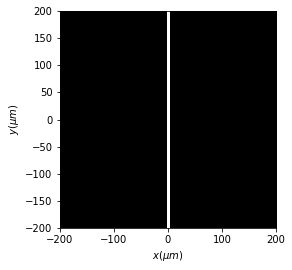

In [13]:
x0 = np.linspace(-200 * um, 200 * um, 512)
y0 = np.linspace(-200 * um, 200 * um, 512)
wavelength = 5 * um


u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.plane_wave(A=1)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.slit(x0=0, size=5 * um, angle=0 * degrees)

u2 = u1 * t1
u2.draw()

(-20.0, 20.0)

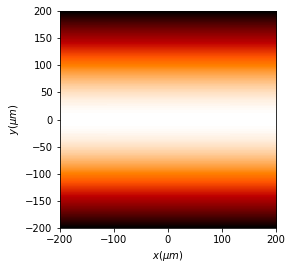

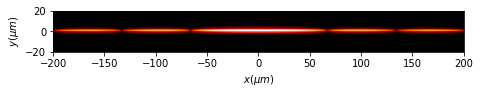

In [14]:
u3 = u2.RS(z=200 * mm, new_field=True)
u3.draw(logarithm=1e3)
u3 = u2.fft(remove0=False, new_field=True)
u3.cut_resample(x_limits='', y_limits='', num_points=[1024, 1024])
u3.draw(logarithm=1)
plt.ylim(-20,20)


(-200.0, 200.0)

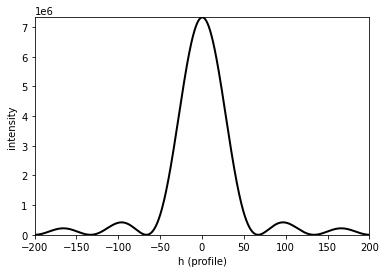

In [15]:
u3.draw_profile(point1=(u3.x[0], 0),
                point2=(u3.x[-1], 0),
                npixels=1024,
                kind='intensity',
                order=1)
plt.xlim(-200, 200)


In [47]:
theta=1.22*5.5e-7/7e-2
print(theta)
x=31.2 #m
print(x*theta)

9.585714285714285e-06
0.00029907428571428565
